In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 선형회귀

통계학에서 선형 회귀는 종속 변수 y와 한 개 이상의 독립 변수 X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다.

한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다.

## 1-1. 선형 회귀

### 예제 1

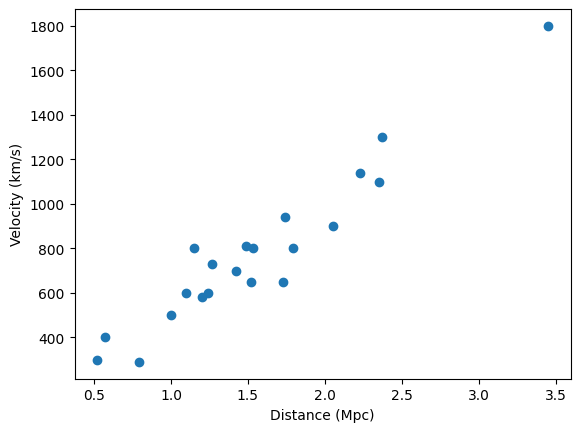

In [41]:
data_hubble = np.loadtxt("hubble.txt")
x = data_hubble[:,0] # 은하까지의 거리 (단위: Mpc)
y = data_hubble[:,1] # 은하가 멀어지는 속도 (단위: km/s)

plt.scatter(x,y)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(x.reshape(-1,1), y)    # x.reshape(-1,1): 샘플이 n개, 특성이 1개인 입력으로 변경한다는 뜻

# 기울기와 절편 구하기
print(lr.coef_)
print(lr.intercept_)

[487.51618131]
25.75471169233583


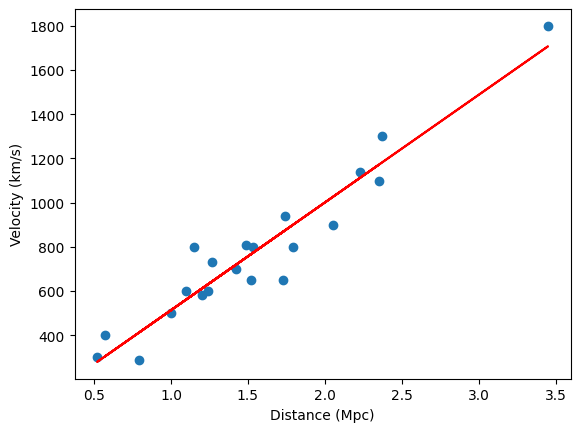

In [43]:
plt.scatter(x,y)
plt.plot(x, lr.predict(x.reshape(-1,1)), color='red')
#plt.plot(x, lr.coef_*x + lr.intercept_, color='red')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.show()

In [44]:
print(lr.score(x.reshape(-1,1), y))   # R^2 점수

0.9154877367289038


In [45]:
print(lr.predict([[5]]))

[2463.33561825]


### 예제 2

#### Trial 1

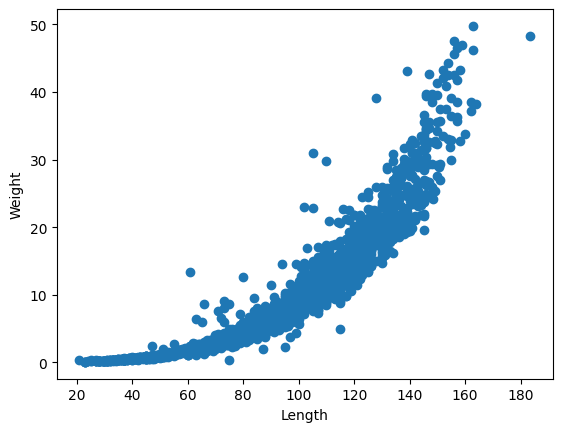

In [33]:
data_fish = np.loadtxt("fish.txt")
x = data_fish[:,0] # 길이
y = data_fish[:,1] # 무게

plt.scatter(x,y)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(x.reshape(-1,1), y)    # x.reshape(-1,1): 샘플이 n개, 특성이 1개인 입력으로 변경한다는 뜻

# 기울기와 절편 구하기
print(lr.coef_)
print(lr.intercept_)

[0.25534775]
-14.456790234004226


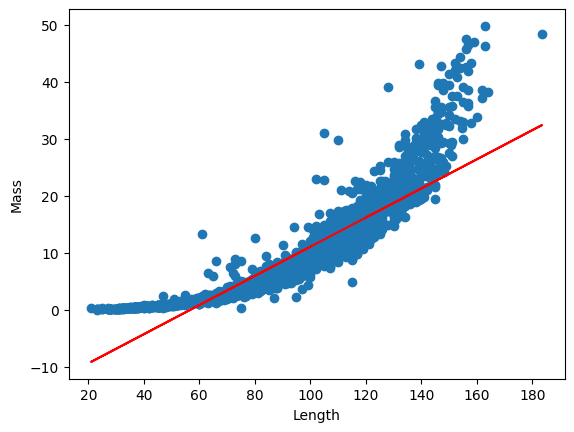

In [35]:
plt.scatter(x,y)
plt.plot(x, lr.predict(x.reshape(-1,1)), color='red')
#plt.plot(x, lr.coef_*x + lr.intercept_, color='red')
plt.xlabel('Length')
plt.ylabel('Mass')
plt.show()

In [36]:
print(lr.score(x.reshape(-1,1), y))   # R^2 점수

0.8016455188870631


#### Trial 2

무게(M)와 길이(L)은 $M = AL^b$의 관계라는 걸 알고 있다면, 무게와 길이에 로그를 취하여 우리가 아는 일차함수 꼴로 만들 수 있다:

$$\text{log}M = \text{log}A+b\text{log}L ⇒ y = a_1x+a_2$$

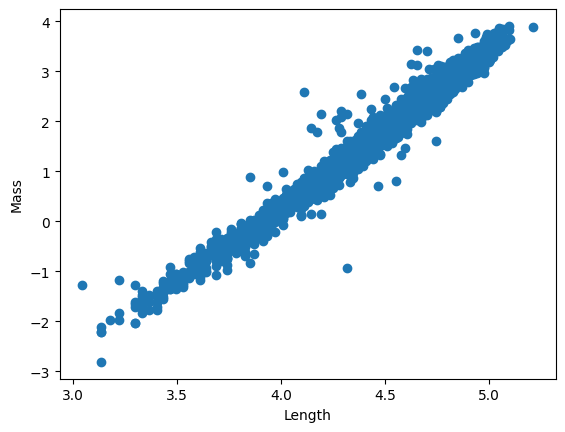

In [72]:
data_fish = np.loadtxt("fish.txt")
x = np.log(data_fish[:,0]) # 길이
y = np.log(data_fish[:,1]) # 무게

plt.scatter(x,y)
plt.xlabel('Length')
plt.ylabel('Mass')
plt.show()

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(x.reshape(-1,1), y)    # x.reshape(-1,1): 샘플이 n개, 특성이 1개인 입력으로 변경한다는 뜻

# 기울기와 절편 구하기
print(lr.coef_)
print(lr.intercept_)

[3.13897485]
-12.289372277605471


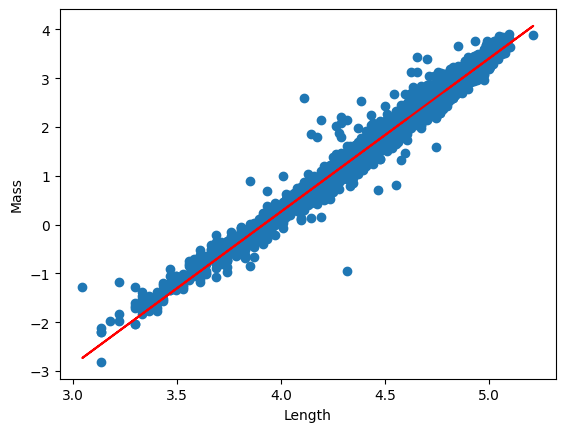

In [74]:
plt.scatter(x,y)
plt.plot(x, lr.predict(x.reshape(-1,1)), color='red')
#plt.plot(x, lr.coef_*x + lr.intercept_, color='red')
plt.xlabel('Length')
plt.ylabel('Mass')
plt.show()

In [75]:
print(lr.score(x.reshape(-1,1), y))   # R^2 점수

0.9715955171002039


In [76]:
print(lr.predict([[5]]))
np.exp(3.40550196)

[3.40550196]


np.float64(30.129415690291037)

## 1-2. 다항 회귀

### 예제 2

#### Trial 3

In [77]:
data_fish = np.loadtxt("fish.txt")
x = data_fish[:,0] # 길이
x_poly = np.column_stack((x**2, x))
y = data_fish[:,1] # 무게

In [78]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(x_poly, y)

# 기울기와 절편 구하기
print(lr.coef_)
print(lr.intercept_)

[ 0.00287401 -0.26278859]
6.737330092784012


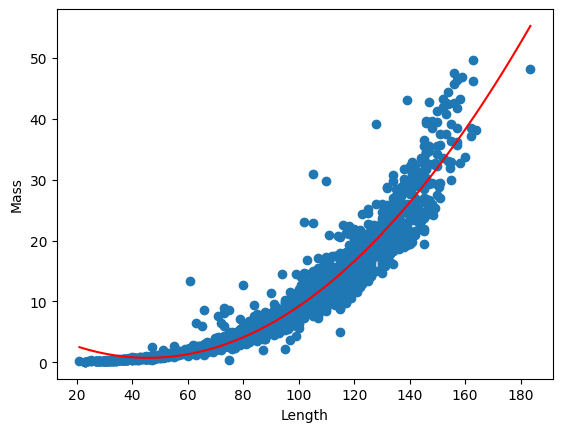

In [79]:
xarr = np.linspace(x.min(), x.max(), 100)
plt.scatter(x,y)
plt.plot(xarr, lr.coef_[0]*xarr**2 + lr.coef_[1]*xarr + lr.intercept_, color='red')
plt.xlabel('Length')
plt.ylabel('Mass')
plt.show()

In [80]:
print(lr.score(x_poly, y))   # R^2 점수

0.9375661906904635


In [84]:
print(lr.predict([[100**2, 100]]))

[9.19855618]


#### Trial 4

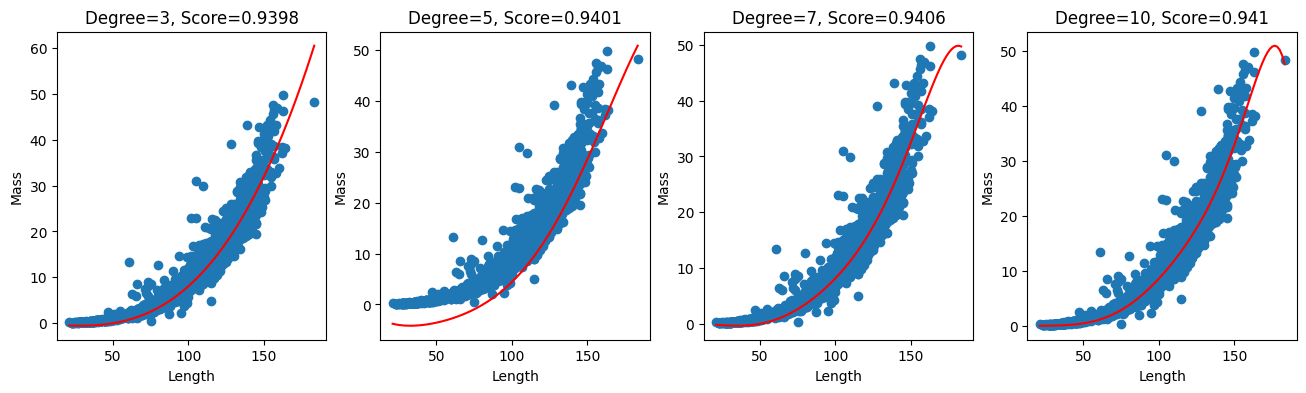

In [106]:
def make_poly_features(x, degree):
    """
    x: 1D array of shape (n_samples,)
    degree: 원하는 최대 차수 (예: degree=3 이면 [x^3, x^2, x^1] 반환)
    """
    # 1차부터 degree차까지 차례대로 쌓고 싶으면 range(1, degree+1)
    # degree차부터 1차까지 내림차순으로 쌓고 싶으면 range(degree, 0, -1)
    powers = [x**i for i in range(degree, 0, -1)]
    return np.column_stack(powers)

def make_poly_function(xarr, degree, lr):
    """
    x: 1D array of shape (n_samples,)
    degree: 원하는 최대 차수 (예: degree=3 이면 [x^3, x^2, x^1] 반환)
    """
    # 1차부터 degree차까지 차례대로 쌓고 싶으면 range(1, degree+1)
    # degree차부터 1차까지 내림차순으로 쌓고 싶으면 range(degree, 0, -1)
    powers = [lr.coef_[degree-i]*xarr**i for i in range(degree, 0, -1)]
    return np.sum(powers, axis=0)

plt.figure(figsize=(16,4))
data_fish = np.loadtxt("fish.txt")
for idx, degree in enumerate([3,5,7,10]):
  x = data_fish[:,0] # 길이
  y = data_fish[:,1] # 무게
  x_poly = make_poly_features(x, degree)

  # 선형 회귀 모델을 훈련
  lr.fit(x_poly, y)

  # 그림 그리기
  xarr = np.linspace(x.min(), x.max(), 100)
  plt.subplot(1,4,idx+1)
  plt.scatter(x,y)
  #plt.plot(xarr, lr.coef_[0]*xarr**2 + lr.coef_[1]*xarr + lr.intercept_, color='red')
  plt.plot(xarr, make_poly_function(xarr, degree, lr), color='red')
  plt.xlabel('Length')
  plt.ylabel('Mass')
  plt.title(f'Degree={degree}, Score={round(lr.score(x_poly, y), 4)}')
plt.show()

## 1-3. 곡선 적합
곡선 적합(Curve Fitting)은 주어진 데이터 포인트에 가장 잘 맞는 곡선 또는 함수를 찾는 과정이다. 데이터의 패턴을 분석하고, 추세를 파악하거나, 미래 값을 예측하는 데 사용된다.

대표적인 방법으로는 보간법과 회귀분석이 있다. 보간법은 주어진 점들을 정확히 지나는 함수를 찾고, 회귀분석은 데이터의 추세를 반영하는 함수를 찾는 방법이다.

### 예제 1

In [112]:
from scipy.optimize import curve_fit

x = data_hubble[:,0] # 은하까지의 거리 (단위: Mpc)
y = data_hubble[:,1] # 은하가 멀어지는 속도 (단위: km/s)

# y = a * x + b 형태의 함수 정의
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, x, y)
a_est, b_est = popt
print(a_est, b_est)

487.51618102396947 25.754711286213364


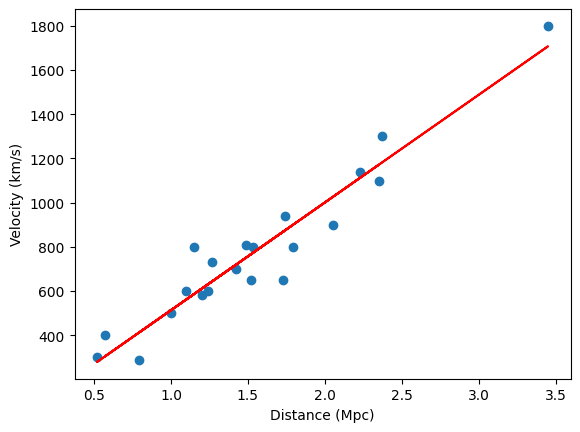

In [111]:
plt.scatter(x,y)
plt.plot(x, a_est*x+b_est, color='red')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.show()

### 예제 2


In [116]:
data_fish = np.loadtxt("fish.txt")
x = data_fish[:,0] # 길이
y = data_fish[:,1] # 무게

# y = a * x^b + c 형태의 함수 정의
def func(x, a, b, c):
    return a*x**b + c

popt, pcov = curve_fit(func, x, y)
print(popt)

[ 3.95452937e-06  3.18054504e+00 -1.07377470e-01]


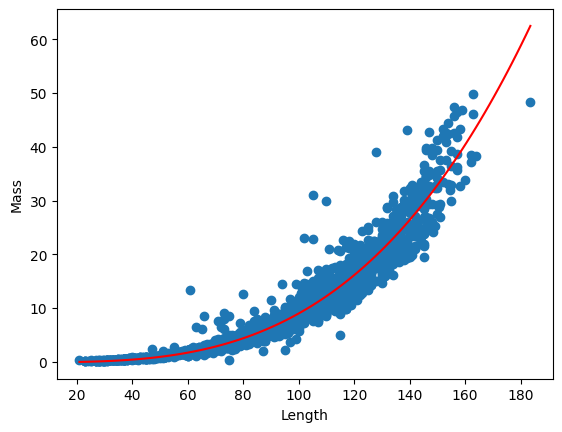

In [119]:
xarr = np.linspace(x.min(), x.max(), 100)
plt.scatter(x,y)
plt.plot(xarr, popt[0]*xarr**popt[1] + popt[2], color='red')
plt.xlabel('Length')
plt.ylabel('Mass')
plt.show()

## 1-4. 다중 회귀
여러 개의 특성을 사용한 선형 회귀로 '다중 회귀(multiple regression)'이라고 한다.

### 예제 3

Target Data

- 1978 보스턴 주택 가격
- 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

Feature Data

- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율

In [135]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
df = pd.read_csv('Boston_house.csv')
df

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [145]:
x = df[['LSTAT', 'PTRATIO']]
y = df['Target']

# 훈련 세트와 테스트 세트로 나누어 보자
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(x, y, random_state=42)

# 다중 선형 회귀 모델 생성 및 학습
lr = LinearRegression()
lr.fit(train_input, train_target)

# 성능 평가
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.6088484763346483
0.584134270522785


------------------------------
# 2. 로지스틱 회귀
둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)라고 한다. 그리고 이런 문제를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있다.

- 참고: https://wikidocs.net/206425

In [152]:
# x 는 종양의 크기를 센티미터 단위로 기록한 것이다.
x = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

# LogisticRegression() 함수가 작동하려면 X를 행에서 열로 재형성해야 한다.
# y는 종양이 암인지 여부를 나타낸다 (0은 "아니오", 1은 "예").
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

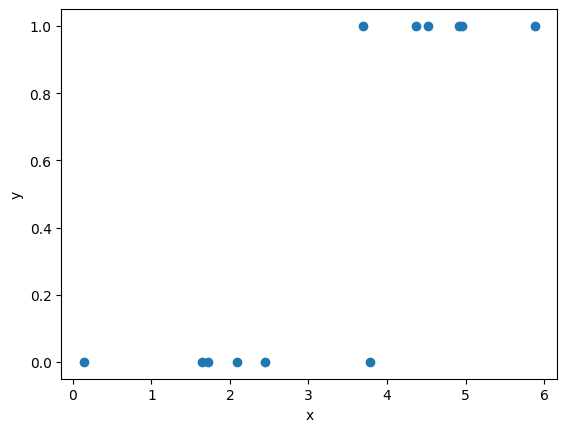

In [161]:
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [153]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [158]:
# 크기가 3.46mm인 종양이 암인지 예측한다.
print(lr.predict(np.array([3.46]).reshape(-1,1)))

[0]


In [159]:
# 크기가 3.46mm인 종양이 암일 확률을 보여준다
print(lr.predict_proba(np.array([3.46]).reshape(-1,1)))

[[0.50241666 0.49758334]]


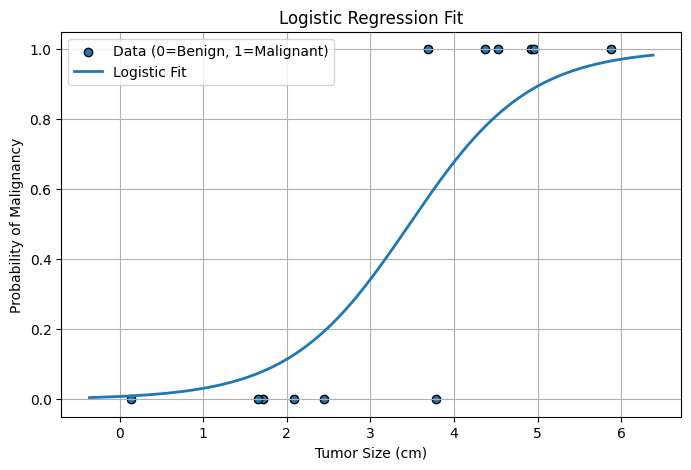

In [163]:
# Generate points for plotting the sigmoid curve
x_plot = np.linspace(x.min() - 0.5, x.max() + 0.5, 300).reshape(-1,1)
y_prob = lr.predict_proba(x_plot)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Data (0=Benign, 1=Malignant)', edgecolors='k')
plt.plot(x_plot, y_prob, label='Logistic Fit', linewidth=2)
plt.xlabel('Tumor Size (cm)')
plt.ylabel('Probability of Malignancy')
plt.title('Logistic Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

____________________________
# 3. k-평균 클러스터링

k-평균 클러스터링은 그룹 중심까지의 거리를 최소화하도록 다변량 데이터를 상대적으로적은 수($k$)의 그룹 또는 범주로 분류하는 비지도 기법.

In [171]:
n = 150
x_list = np.random.rand(n)
y_list = np.random.rand(n)

data = np.zeros((n,2))
for i in range(n):
  data[i] = [x_list[i], y_list[i]]

In [172]:
# 1. 무작위로 클러스터 중심 k개를 초기화한다.

k = 3
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]  # data 행렬은 특징별 샘플이다.
centroids

array([[0.05479808, 0.99360633],
       [0.23824643, 0.96057558],
       [0.41431736, 0.4498529 ]])

In [173]:
# 2. 각 데이터 관측치와 각 클러스터 중심 사이의 거리를 계산한다.

dists = np.zeros((data.shape[0],k))
for ci in range(k):
  dists[:,ci] = np.sqrt(np.sum((data-centroids[ci,:])**2, axis=1))
dists[:10,:]

array([[0.28784101, 0.14152096, 0.3989502 ],
       [1.04955011, 0.8805965 , 0.52191948],
       [0.23775405, 0.2843913 , 0.48344742],
       [0.73983741, 0.68724007, 0.25917607],
       [0.14896964, 0.1003418 , 0.50849645],
       [0.12388408, 0.06272542, 0.57683973],
       [1.04156821, 0.92733284, 0.39048293],
       [0.63556516, 0.55668133, 0.12170042],
       [0.616466  , 0.47206268, 0.14731745],
       [0.55373389, 0.56228319, 0.39048055]])

In [174]:
# 3. 각 데이터 관측치를 가장 가까운 거리의 그룹에 할당한다.
groupidx = np.argmin(dists,axis=1)
groupidx

array([1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2])

In [175]:
# 4. 클래스 내의 모든 데이터 점의 평균을 계산해서 중심을 다시 설정한다.
for ki in range(k):
  centroids[ki,:] = [np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1])]

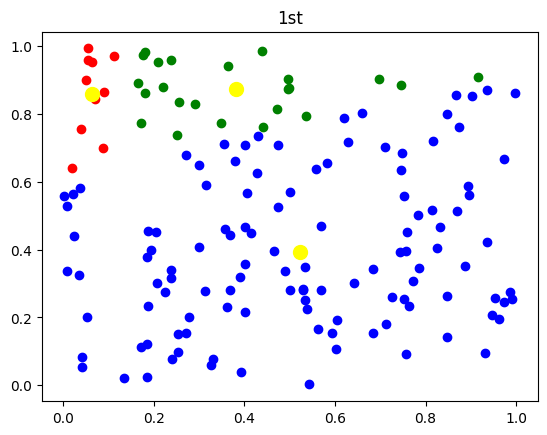

In [176]:
import matplotlib.pyplot as plt

# 데이터
colors = {0: 'red', 1: 'green', 2: 'blue'}
for i in range(data.shape[0]):
  plt.scatter(data[i,0], data[i,1], color=colors[groupidx[i]])
# 클러스터 중심
plt.scatter(centroids[:,0], centroids[:,1], color='yellow', s=100)
plt.title('1st')
plt.show()

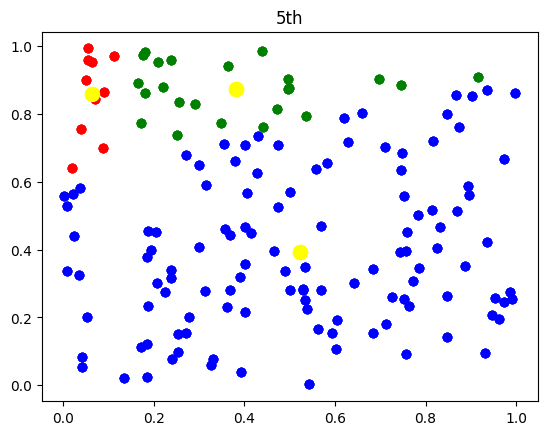

In [178]:
import matplotlib.pyplot as plt

for _ in range(4):
  # 데이터
  colors = {0: 'red', 1: 'green', 2: 'blue'}
  for i in range(data.shape[0]):
    plt.scatter(data[i,0], data[i,1], color=colors[groupidx[i]])
  # 클러스터 중심
  plt.scatter(centroids[:,0], centroids[:,1], color='yellow', s=100)
plt.title('5th')
plt.show()

성능이 썩 좋지 못함. 그래서 다른 클러스터링 기법이 존재함.
- 참고: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

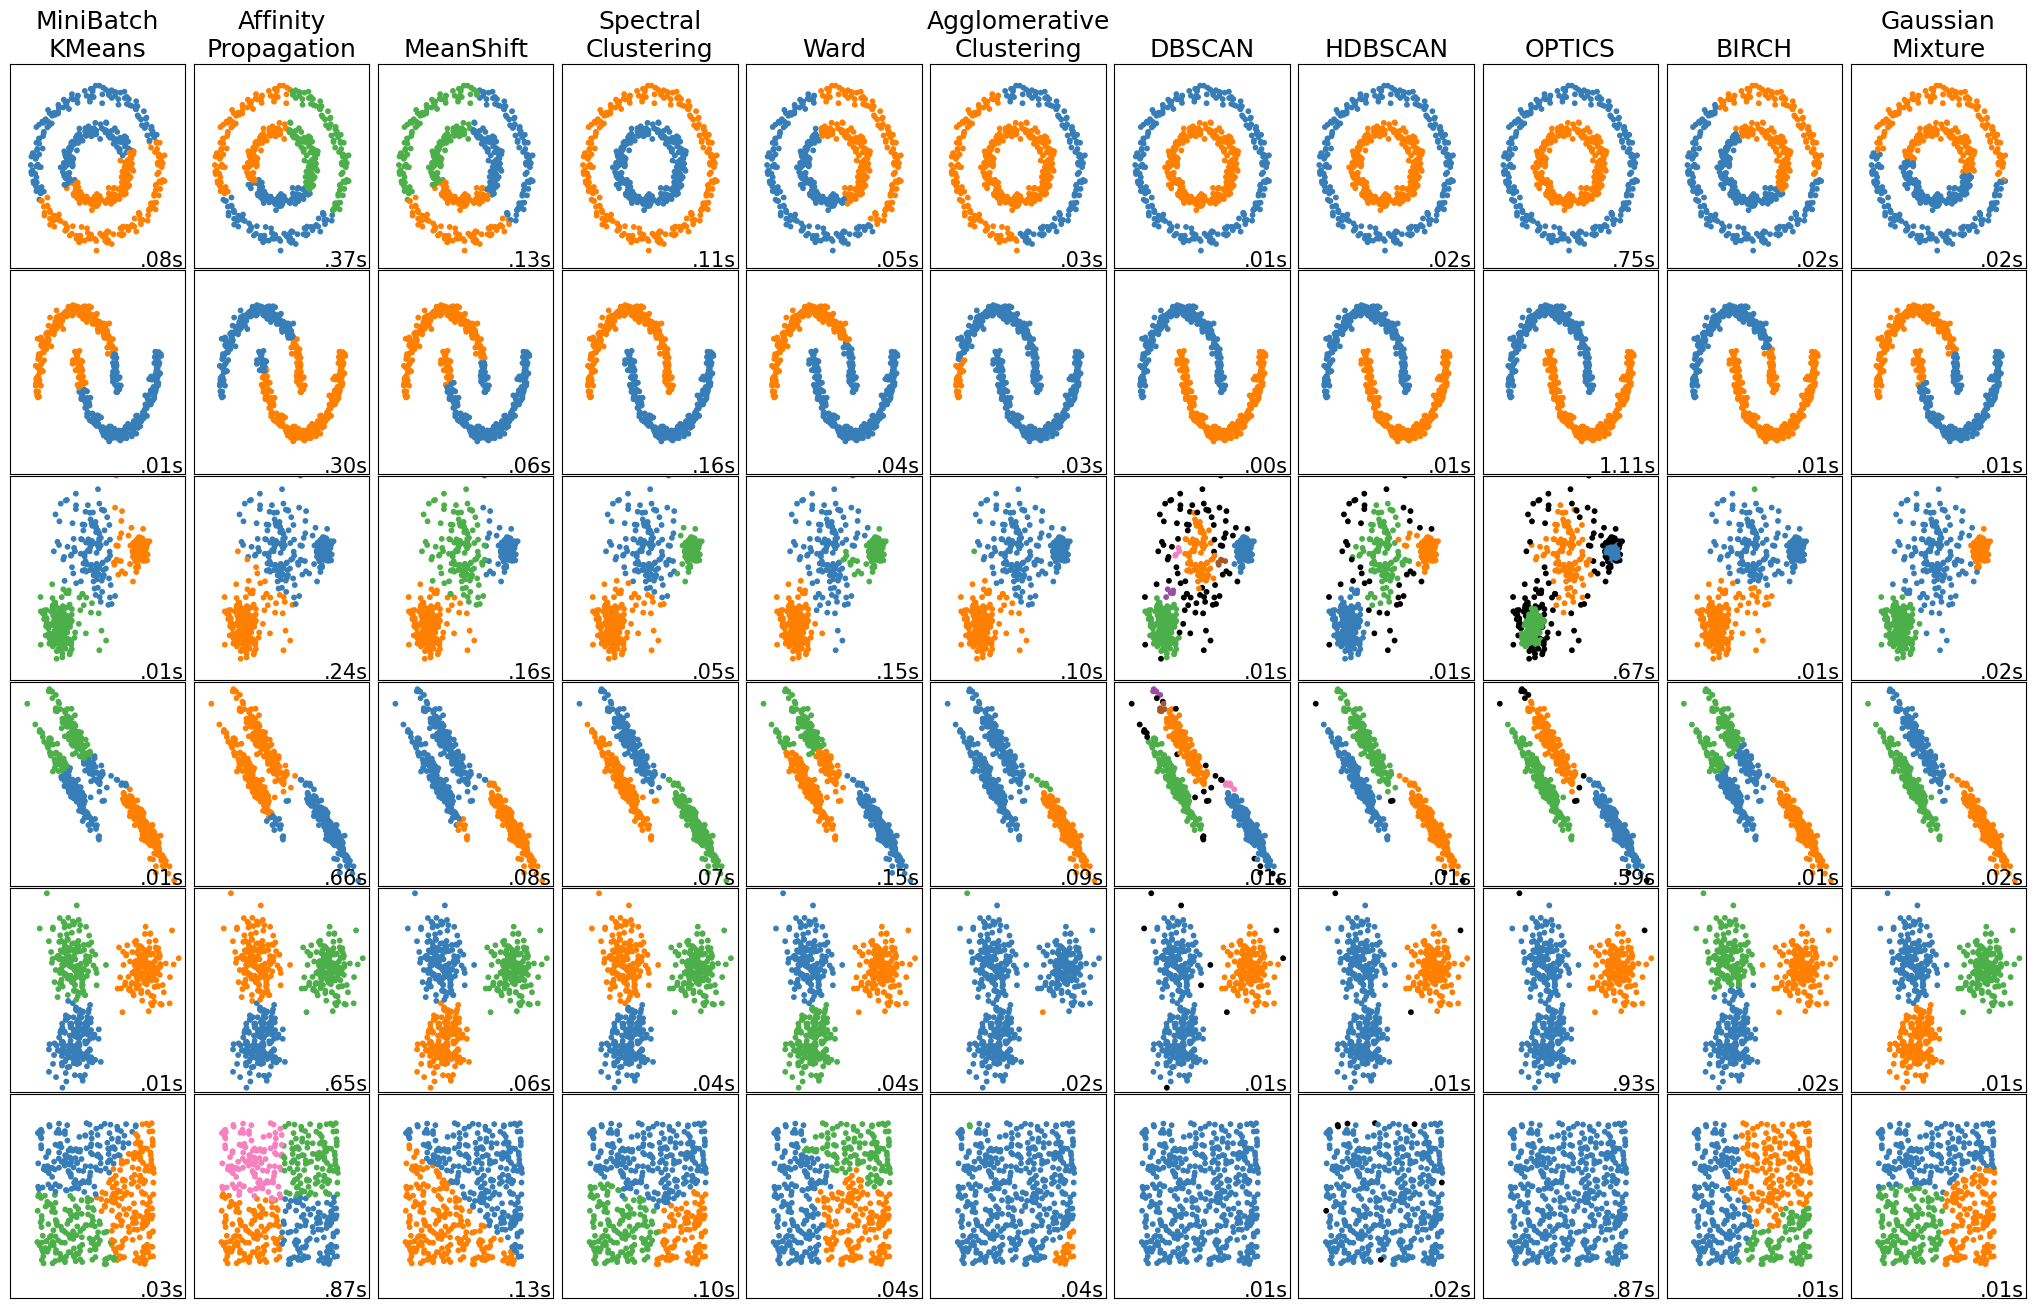

In [179]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                "connectivity matrix is [0-9]{1,2}"
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()